# Validating Model

1. Examining resized images
    1. Load validation data (images with shots).
    2. Resize images.
    3. Examine coordinates that should contain shots.
        1. Is the high attenuation coefficient preserved? How much has it decreased by?

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import zoom
from paralleltomo import paralleltomo

def convert_to_ac(grayscale_im):
    """
    Converts a grayscale image (Numpy array) to an array of attenuation coefficients

    """
    grayScaleToAttCoeff = lambda x: (x/255)*30.32
    cFunc = np.vectorize(grayScaleToAttCoeff)
    return cFunc(grayscale_im)

resize_factor = 200/500

c:\Users\David\Desktop\02526\Exam Project\paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [2]:
# Beginning with plank 1

# slice 1 (slice0.png)
# 1 lead shot
shot_coords = (63, 463)
# New shot coordinates after resizing
new_shot_coords = (round(shot_coords[0]*resize_factor), round(shot_coords[1]*resize_factor))
print(f"Old shot coordinates: {shot_coords}")
print(f"New shot coordinates: {new_shot_coords}")


Old shot coordinates: (63, 463)
New shot coordinates: (25, 185)


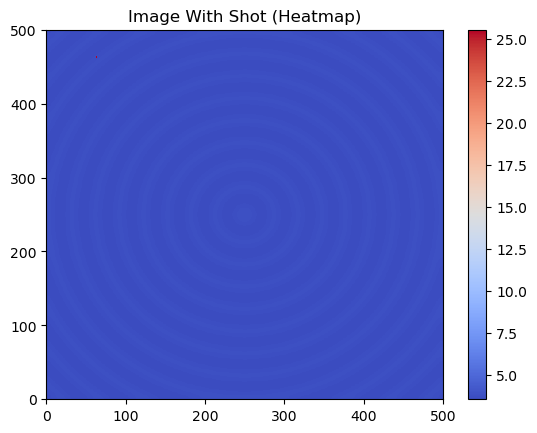

In [3]:
# Loading image, testing if above method is suitable
path_to_slice = "validation data generation/validation-data/plank1/slice0-withshot.png"

img = Image.open(path_to_slice)
# Convert the image to grayscale
img = img.convert('L')
im_array = np.array(img)

# Convert image to attenuation coefficient
im_AC = convert_to_ac(im_array)

# Displaying image (as heatmap)

heatmap = plt.pcolor(im_AC, cmap="coolwarm")
plt.colorbar(heatmap)
plt.title("Image With Shot (Heatmap)")
plt.show()

In [8]:
# Resizing image

resized_im = zoom(im_AC, (75/500,75/500), order=1, mode = "grid-constant")

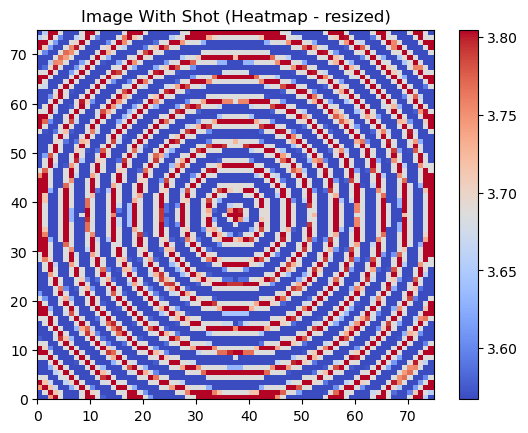

In [9]:
# Analysing resized image

heatmapresized = plt.pcolor(resized_im, cmap="coolwarm")
plt.colorbar(heatmapresized)
plt.title("Image With Shot (Heatmap - resized)")
plt.show()

c:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


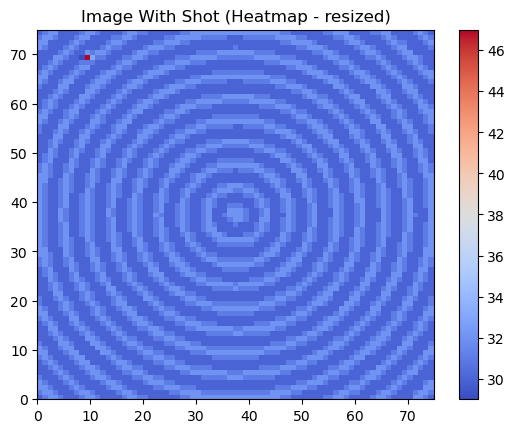

In [10]:
# resizing again, using PIL

resized_im_2 = img.resize((75, 75), Image.ANTIALIAS) 
im_array_2 = np.array(resized_im_2)
# Analysing resized image

heatmapresized_2 = plt.pcolor(resized_im_2, cmap="coolwarm")
plt.colorbar(heatmapresized_2)
plt.title("Image With Shot (Heatmap - resized)")
plt.show()

In [11]:
# Parameters to use
N = 75
theta = np.matrix(np.linspace(0, 180, 90)) 
p = 175
A = paralleltomo(N, theta, p)[0]

c:\Users\David\Desktop\02526\Exam Project\paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [12]:
# Forward projection
x = np.ravel(resized_im_2)

b = np.matmul(A, x)

In [13]:
Q, R = np.linalg.qr(A)

In [14]:
def qr_sol(Q,R,b):
    y = np.dot(Q.T,b)
    n = len(y)
    x = np.zeros(n)

    for i in range(n-1,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] -= R[i,j] * x[j]
        x[i] /= R[i,i]
    return x

In [15]:

x_recreated = qr_sol(Q,R,b)

In [19]:
# reshaping x
x_recreated = x_recreated.reshape((75, 75))

In [20]:
x_recreated

array([[30., 31., 32., ..., 32., 31., 30.],
       [31., 32., 32., ..., 32., 32., 31.],
       [32., 32., 31., ..., 30., 32., 32.],
       ...,
       [32., 32., 30., ..., 30., 31., 32.],
       [31., 32., 32., ..., 31., 32., 31.],
       [30., 31., 32., ..., 32., 31., 30.]])

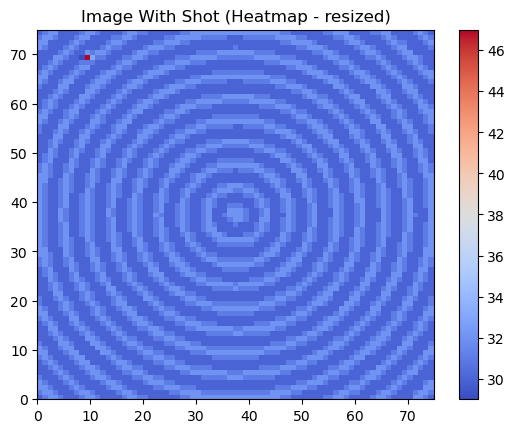

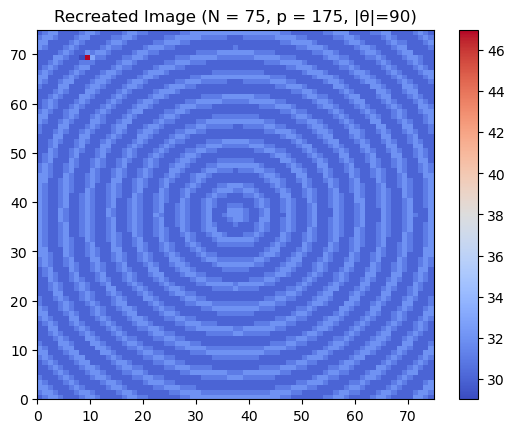

In [21]:
heatmapresized_2 = plt.pcolor(resized_im_2, cmap="coolwarm")
plt.colorbar(heatmapresized_2)
plt.title("Image With Shot (Heatmap - resized)")
plt.show()

heatmap_recreated = plt.pcolor(x_recreated, cmap="coolwarm")
plt.colorbar(heatmap_recreated)
plt.title("Recreated Image (N = 75, p = 175, |\u03B8|=90)")
plt.show()
